In [ ]:
!pip install sklearn
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/cleveland.csv',names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang",	"oldpeak"	,"slope","ca","thal",	"target"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(9), int64(1), object(4)
memory usage: 33.3+ KB


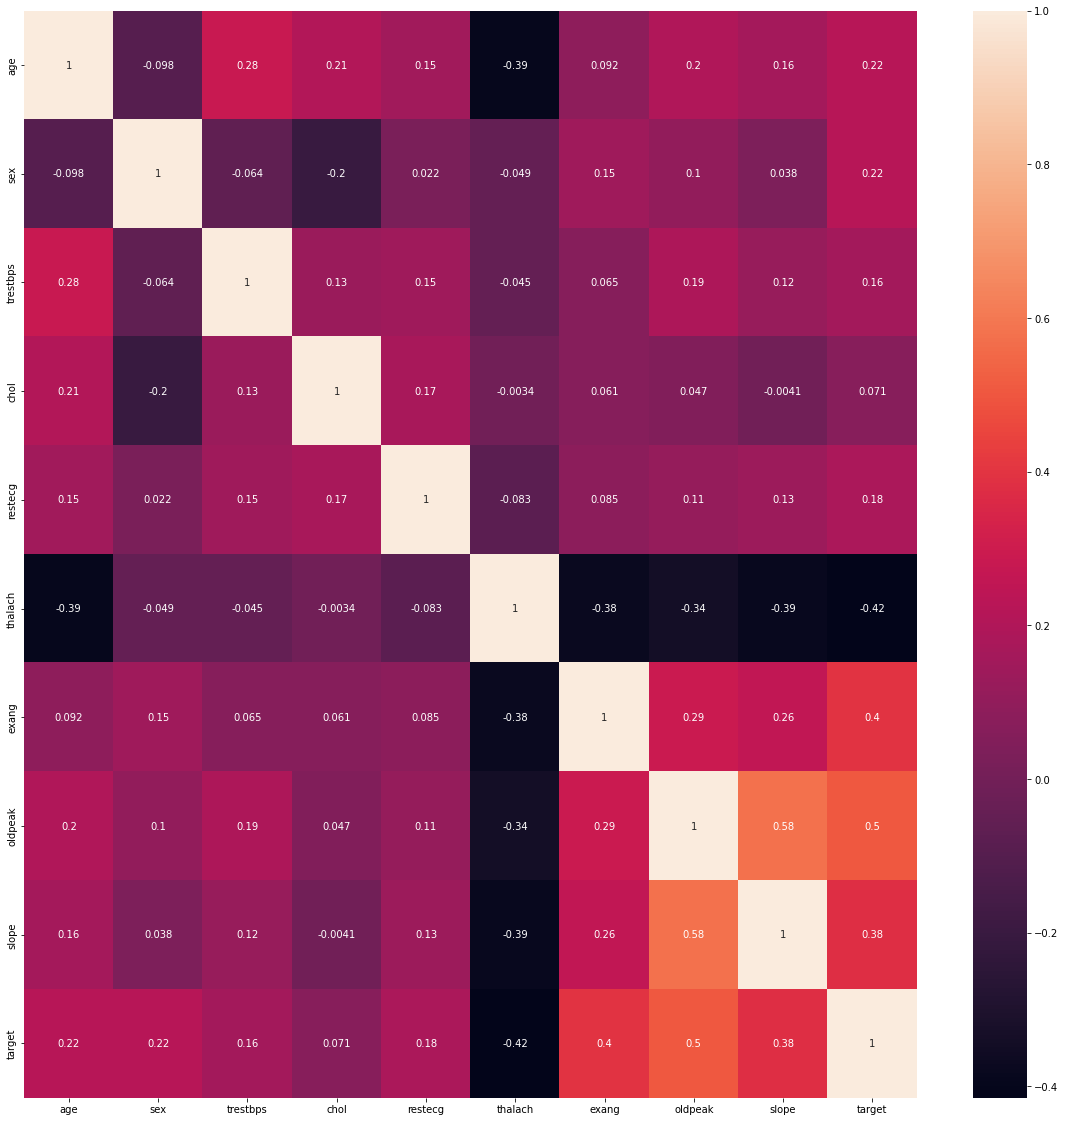

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True)

In [ ]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [ ]:
y = dataset['target']
x = dataset.drop(['target'], axis = 1)

In [ ]:
#split dataset into training and testing dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [ ]:
def random_forest(x_train,y_train):
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(random_state = 0, criterion = "entropy",n_estimators = 10)
  forest.fit(x_train,y_train)
  return forest

In [ ]:
def decision_tree(x_train,y_train):
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(random_state = 0, criterion = "entropy")
  tree.fit(x_train,y_train)
  return tree

In [ ]:
def logistic_regression(x_train,y_train):
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(x_train,y_train)
  return log


In [ ]:
model=[]
model.append(logistic_regression(x_train,y_train))
model.append(decision_tree(x_train,y_train))
model.append(random_forest(x_train,y_train))

In [ ]:
#testing the model/result

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss

for i in range(len(model)):
  print('\n')
  print("Model",i)
  print(classification_report(y_test,model[i].predict(x_test)))
  print('Accuracy : ',accuracy_score(y_test,model[i].predict(x_test)))
  



Model 0
              precision    recall  f1-score   support

           0       0.75      0.89      0.82        47
           1       0.33      0.16      0.21        19
           2       0.29      0.17      0.21        12
           3       0.29      0.56      0.38         9
           4       0.00      0.00      0.00         4

    accuracy                           0.57        91
   macro avg       0.33      0.35      0.32        91
weighted avg       0.52      0.57      0.53        91

Accuracy :  0.5714285714285714


Model 1
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        47
           1       0.33      0.32      0.32        19
           2       0.23      0.25      0.24        12
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         4

    accuracy                           0.51        91
   macro avg       0.26      0.27      0.27        91
weighted avg       0.49   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
